<h1> Statistiques par film </h1>

# Choices

In [671]:
#genre of the movies
movie_genre = 'horror' #'action' or 'romance'

#name of the movie
movie_name = 'Scream'

#Path to the data
path_to_data = '../data/script/'

#path to the movies whose genre is selected
path_to_movie = path_to_data + movie_genre + '/clean/' + movie_name + '.csv'

# Import

In [672]:
import os #get all the files in a folder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import operator

# Open files

In [673]:
movie_script = pd.read_csv(path_to_movie, sep = '|') #read the script

# Clean the text

In [674]:
def clean_text_from_nrt(text):
    return text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

In [675]:
def clean_text_to_lower(text):
    return text.lower()

In [676]:
if False:
    def remove_text_inside_brackets(text):
        if ('(' in text) or (')' in text) or (not np.isnan(text)):
            return re.sub(r'\([^)]*\)', '', text)
        else:
            return text

In [677]:
movie_script.head(10)

,Unnamed: 0,character,text,type,character_clean,gender
0,0,NaN,SCREAM\r\n(SCARY MOVIE)\r\nby Kevin Williamson...,unknown,NaN,NaN
1,1,NaN,FADE IN\r\nON A RINGING TELEPHONE.\r\nA hand r...,stage direction,NaN,NaN
2,2,CASEY,Hello.,speech,CASEY,F
3,3,NaN,(from phone),location,NaN,NaN
4,4,MAN'S VOICE,Hello.,speech,MAN'S VOICE,?
5,5,NaN,Silence.,stage direction,NaN,NaN
6,6,CASEY,Yes.,speech,CASEY,F
7,7,MAN,Who is this?,speech,MAN,F
8,8,CASEY,Who are you trying to reach?,speech,CASEY,F
9,9,MAN,What number is this?,speech,MAN,F


In [678]:
# Remove `\n` `\r` and `\t` from the text
movie_script['text'] = movie_script['text'].apply(clean_text_from_nrt) 
        
# Lowerize    
movie_script['text'] = movie_script['text'].apply(clean_text_to_lower)

In [679]:
movie_script[60:80]

,Unnamed: 0,character,text,type,character_clean,gender
60,60,MAN,freddy-that's right. i liked that movie. it w...,speech,MAN,F
61,61,CASEY,"the first one was, but the rest sucked.",speech,CASEY,F
62,62,MAN,"so, you gotta boyfriend?",speech,MAN,F
63,63,NaN,(giggling),location,NaN,NaN
64,64,CASEY,why? you wanna ask me out?,speech,CASEY,F
65,65,MAN,maybe. do you have a boyfriend?,speech,MAN,F
66,66,CASEY,no.,speech,CASEY,F
67,67,MAN,you never told me your name.,speech,MAN,F
68,68,NaN,"casey smiles, twirling her hair.",stage direction,NaN,NaN
69,69,CASEY,why do you want to know my name?,speech,CASEY,F


# Number of characters

In [680]:
all_chars = movie_script.character_clean.unique()
print(all_chars)
print('There are %.0f characters.' %(len(all_chars)-1)) #one removes the NaN

[nan 'CASEY' "MAN'S VOICE" 'MAN' 'FATHER' 'MOTHER' 'VOICE' 'SIDNEY' 'BILLY'
 'MR. PRESCOTT' 'DISC JOCKEY' 'GALE' 'TATUM' 'MRS. TATE' 'SHERIFF BURKE'
 'DEWEY' 'MR. HIMBRY' 'STU' 'RANDY' 'REPORTER #1' 'REPORTER #2' 'KENNY'
 'MR. LOOMIS' 'MAMA RILEY' 'REPORTER' 'GIRL #1' 'GIRL #2' 'GHOST #1'
 'GHOST #2' 'CHECK OUT LADY' 'SOME TEEN' 'ANOTHER TEEN' 'TEEN #1' 'TEEN #2'
 'TEEN #3' 'BORED TEEN' 'BOY TEEN' 'OTHER GUYS']
There are 37 characters.


# Gender analysis

## Who is a (fe)male ?

In [681]:
df_character_gender = movie_script[['character_clean', 'gender']].drop_duplicates()
df_character_gender.reset_index(drop = True)

,character_clean,gender
0,NaN,NaN
1,CASEY,F
2,MAN'S VOICE,?
3,MAN,F
4,FATHER,M
5,MOTHER,F
6,VOICE,F
7,SIDNEY,F
8,BILLY,F
9,MR. PRESCOTT,F


(30, 928, 716)


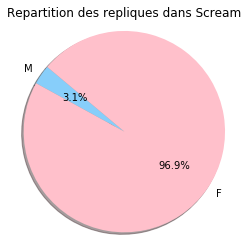

In [682]:
i=1
male_nb_speech=np.sum(movie_script.gender == 'M')
female_nb_speech=np.sum(movie_script.gender == 'F')
unknown_nb_speech = np.sum((movie_script.gender != 'F') & (movie_script.gender != 'M'))

print(male_nb_speech, female_nb_speech, unknown_nb_speech)
# Data to plot
labels = ["M","F"]
sizes = [male_nb_speech, female_nb_speech]
colors = ['lightskyblue', 'pink']

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Repartition des repliques dans %s' %movie_name) 
plt.axis('equal')
plt.show()

# Count the number of replicas by character

In [683]:
count_replicas_character = Counter(movie_script.character_clean)
sorted_count_replicas_character = sorted(count_replicas_character.items(), key=operator.itemgetter(1), reverse = True)

In [684]:
df_character_replicas = pd.DataFrame(sorted_count_replicas_character, columns=['character_clean', 'n_replicas'])
df_character_replicas

,character_clean,n_replicas
0,NaN,679
1,SIDNEY,195
2,TATUM,103
3,BILLY,100
4,MAN,96
5,STU,85
6,DEWEY,77
7,CASEY,76
8,GALE,75
9,RANDY,63


In [685]:
df_character = pd.merge(df_character_replicas, df_character_gender,  how = 'inner', on = 'character_clean')

In [686]:
df_character

,character_clean,n_replicas,gender
0,NaN,679,NaN
1,SIDNEY,195,F
2,TATUM,103,F
3,BILLY,100,F
4,MAN,96,F
5,STU,85,F
6,DEWEY,77,F
7,CASEY,76,F
8,GALE,75,F
9,RANDY,63,F


# When do they talk ?

In [687]:
movie_script_speech = movie_script[movie_script['type'] == 'speech']
movie_script_speech.reset_index(inplace=True, drop = True)
movie_script_speech.head()

,Unnamed: 0,character,text,type,character_clean,gender
0,2,CASEY,hello.,speech,CASEY,F
1,4,MAN'S VOICE,hello.,speech,MAN'S VOICE,?
2,6,CASEY,yes.,speech,CASEY,F
3,7,MAN,who is this?,speech,MAN,F
4,8,CASEY,who are you trying to reach?,speech,CASEY,F


In [688]:
length_speech = movie_script_speech.shape[0]
length_speech

995

In [689]:
# Number of histograms
nbins = 10

#dataframe
df_repartition_speech_gender = pd.DataFrame()

length_bin = length_speech/nbins
end_bin = -1
for n in range(nbins):
    begin_bin = end_bin+1
    end_bin = int((n+1)*length_bin)+1
    #print(begin_bin, end_bin)
    
    #Male speech
    nb_male_speech_bin = np.sum((movie_script_speech.gender == 'M')[begin_bin:end_bin])
    #print(nb_male_speech_bin)
    
    #Female speech
    nb_female_speech_bin = np.sum((movie_script_speech.gender == 'F')[begin_bin:end_bin])
    #print(nb_female_speech_bin)
    
    #Percentage
    pct_male_speech_bin = round(float(nb_male_speech_bin) / float(nb_male_speech_bin+nb_female_speech_bin),2)
    pct_female_speech_bin = round(float(nb_female_speech_bin) / float(nb_male_speech_bin+nb_female_speech_bin),2)
    #print(pct_male_speech_bin, pct_female_speech_bin)
    
    #add to the dataframe
    df_repartition_speech_gender = df_repartition_speech_gender.append({'bin' : n, 'pct_male' : pct_male_speech_bin, 
                                                                       'pct_female' : pct_female_speech_bin}, ignore_index=True)


In [690]:
df_repartition_speech_gender

,bin,pct_female,pct_male
0,0.0,1.00,0.00
1,1.0,0.92,0.08
2,2.0,0.97,0.03
3,3.0,0.98,0.02
4,4.0,0.97,0.03
5,5.0,0.94,0.06
6,6.0,0.97,0.03
7,7.0,0.96,0.04
8,8.0,0.98,0.02
9,9.0,1.00,0.00


# Search for specific words

In [691]:
all_speech = ' '.join(movie_script_speech.text).split(' ')

In [692]:
all_speech.count('son') + all_speech.count('boy')

0

In [693]:
all_speech.count('daughter') + all_speech.count('girl')

5

In [694]:
all_speech.count('father') + all_speech.count('dad') + + all_speech.count('daddy')

9

In [695]:
all_speech.count('mother') + all_speech.count('mum') + all_speech.count('mom') + all_speech.count('mommy')

18

# Search for specific thematics

In [696]:
thematics_indoor = ['kitchen','bed','bedroom','bath','bathroom','toilet']

In [697]:
thematics_space_adventure = ['space','spaceship','war','destruction','explosion','adventure']

In [698]:
thematics_swear = ['fuck','shit','fucking','motherfucker','dickhead','asshole']

In [707]:
thematics_death = ['death','died','murder','killer','blood','die']

In [708]:
#Choice of thematics
thematics = thematics_death

thematic_count = 0
for w in thematics:
    thematic_count += all_speech.count(w)
    print(w, all_speech.count(w))
    
print(thematic_count)    

('death', 4)
('died', 0)
('murder', 3)
('killer', 13)
('blood', 2)
('die', 1)
23


In [700]:
from nltk.corpus import stopwords
all_stopwords = stopwords.words("english")

#tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') #to remove punctuations


In [701]:
def clean_body(text):
    token = tokenizer.tokenize(' '.join(text))
    del_sw = [word for word in token if word not in all_stopwords]
    return del_sw #' '.join(del_sw)

In [702]:
all_clean_speech = clean_body(all_speech)

In [703]:
most_recurrent_words = Counter(all_clean_speech)
sorted_most_recurrent_words = sorted(most_recurrent_words.items(), key=operator.itemgetter(1), reverse = True)

In [704]:
sorted_most_recurrent_words[:20]

[('know', 47),
 ('sid', 46),
 ('like', 42),
 ('think', 41),
 ('sidney', 32),
 ('get', 31),
 ('billy', 31),
 ('one', 29),
 ('right', 28),
 ('please', 25),
 ('go', 25),
 ('movie', 24),
 ('gonna', 23),
 ('yeah', 22),
 ('night', 21),
 ('shit', 21),
 ('got', 20),
 ('killer', 20),
 ('mom', 20),
 ('oh', 20)]

In [670]:
for row in range(movie_script_speech.shape[0]):
    txt = movie_script_speech.text[row]
    if 'son' in txt.split(' '):
        print(txt)
        print('\n')

In [719]:
#Remove verbs

import nltk
#tokens = nltk.word_tokenize(all_clean_speech)

tagged = nltk.pos_tag(all_clean_speech)
tagged[0:6]
all_clean_speech_noun = [elt for elt, pos in tagged if pos == 'NN']

In [722]:
most_recurrent_noun = Counter(all_clean_speech_noun)
sorted_most_recurrent_noun = sorted(most_recurrent_noun.items(), key=operator.itemgetter(1), reverse = True)

In [723]:
sorted_most_recurrent_noun[:10]

[('sid', 32),
 ('sidney', 26),
 ('movie', 24),
 ('night', 21),
 ('please', 17),
 ('mom', 17),
 ('way', 17),
 ('gonna', 16),
 ('killer', 15),
 ('mother', 14)]

In [725]:
#Removes name of people
df_character

,character_clean,n_replicas,gender
0,NaN,679,NaN
1,SIDNEY,195,F
2,TATUM,103,F
3,BILLY,100,F
4,MAN,96,F
5,STU,85,F
6,DEWEY,77,F
7,CASEY,76,F
8,GALE,75,F
9,RANDY,63,F
